#  Workflow of Project

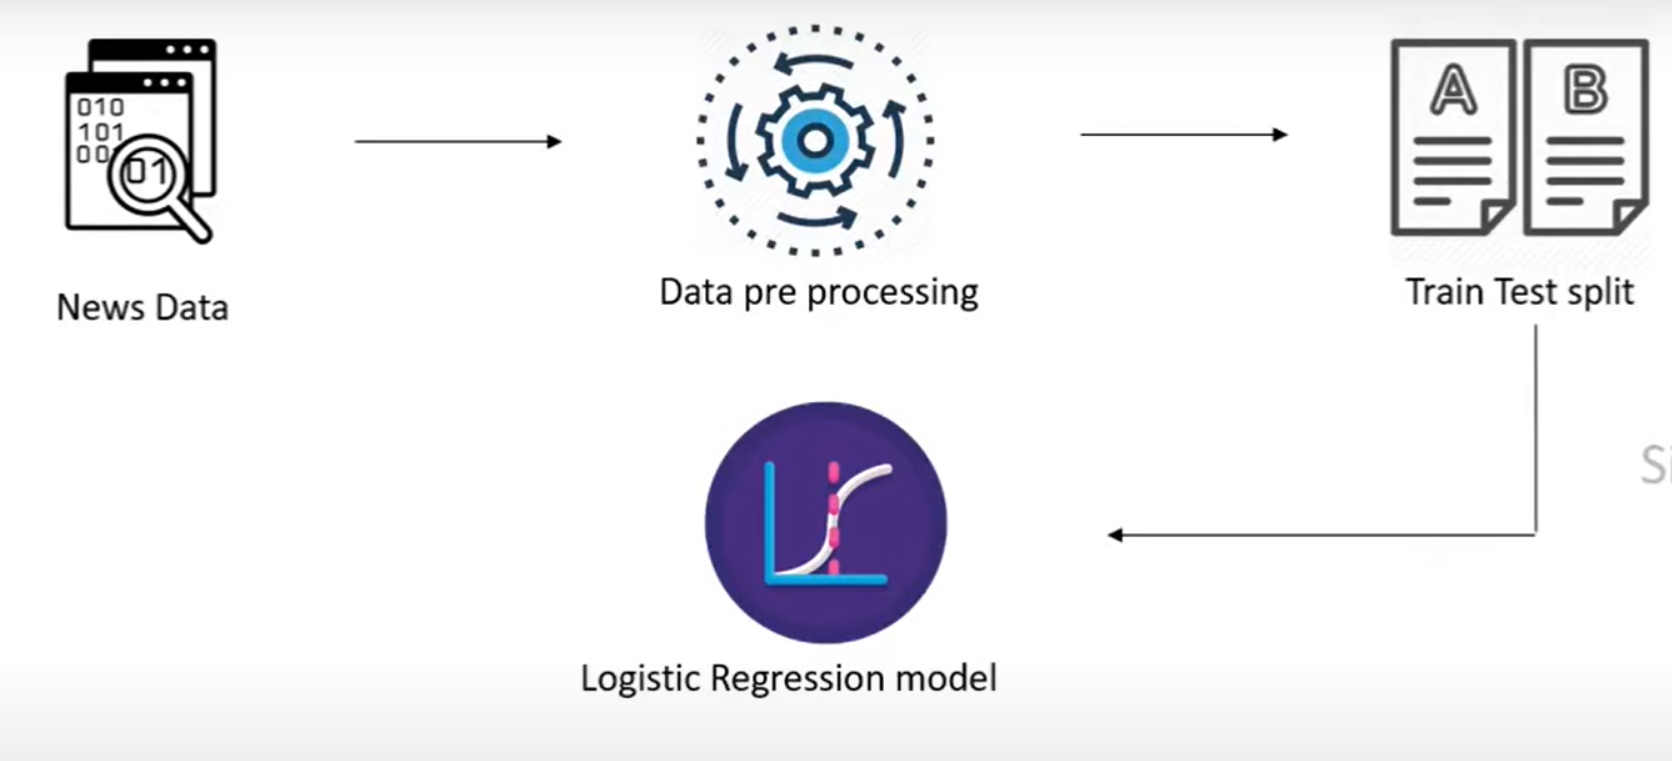

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import multiprocessing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13054\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13054\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
#Adds a class element indicating if it's fake or real
df_fake['class'] = 0
df_true['class'] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
#merging the real and fake data
#Then shuffeling them to mix the fake and real data
df = pd.concat([df_fake, df_true], axis = 0)
df = df.drop('date', axis = 1)
df = df.sample(frac = 1)

df.head(5)

,title,text,subject,class
7429,Watch Desperate Americans Literally BEG Justi...,As Canadian Prime Minister Justin Trudeau cont...,News,0
17152,Kenyan election board chairman says hard to gu...,NAIROBI (Reuters) - Kenya s election board cha...,worldnews,1
4086,WATCH: Trump Admits America Will Pay For His ...,Donald Trump just broke his biggest promise to...,News,0
11567,BREITBART’S JOEL POLLACK Brilliantly Shuts Dow...,Watch Joy Behar as she hilariously attempts to...,politics,0
14146,"MY POPE JUST INVITED A RADICAL, Pro-Abortion S...",Funny I seem to remember being taught as a you...,politics,0


In [8]:
#checking for empty cells
df.isnull().sum()

title      0
text       0
subject    0
class      0
dtype: int64

#  Processing subject and author

In [9]:
#combines the subject and title data
subject_and_title_data = df['subject'] + ' ' + df['title']

subject_and_title_data

7429     News  Watch Desperate Americans Literally BEG ...
17152    worldnews Kenyan election board chairman says ...
4086     News  WATCH: Trump Admits America Will Pay For...
11567    politics BREITBART’S JOEL POLLACK Brilliantly ...
14146    politics MY POPE JUST INVITED A RADICAL, Pro-A...
                               ...                        
15619    politics BREAKING: 4 AMERICAN HOSTAGES TAKEN B...
9482     politics BITTER RADICAL ERIC HOLDER Goes After...
10275    politics 19 SECONDS OF DRAMA: After McCain’s V...
9317     politicsNews Obama slams Trump for promising t...
21013    worldnews India, China need to do more to avoi...
Length: 44898, dtype: object

#  Important Decision (Read)

We made a total of 3 Models before we got an optimized model

Our first approach focused on the subject and title 

We thought making a model based on the text would be to heavy, but after processing the data we were able to process it

There were a few approaches used to shrink the size of the text like:
    - stemming, stopword removal, and lemmatization 

All these approaches drastically shrank the text size while still keeping the most important features

Using all the features, we improved the accuracy by 1.5%

#  Stemming for processing Subject and author

- Removes non-alphabetical character
- makes all characters lowercase
- removes stopwords

In [10]:
port_stem = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [11]:
#Stemming function to optimize our data
def stemming(content):
    #replaces any character that isn'tm a lower or uppercase character with a space
    stemmed_content = re.sub('[^a-zA-z]', ' ', content)
    
    #sets all characters to lower case, optimizes data processing
    stemmed_content = stemmed_content.lower()
    
    #converts stemmed_content into an array that can be stemmed
    stemmed_content = stemmed_content.split()
    
    #stemms each word in our array
    #removes stop words
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    
    #converts stemmed_content back to a String
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [12]:
subject_and_title_data = subject_and_title_data.apply(stemming)
subject_and_title_data

7429     news watch desper american liter beg justin tr...
17152    worldnew kenyan elect board chairman say hard ...
4086     news watch trump admit america pay dumb billio...
11567    polit breitbart joel pollack brilliantli shut ...
14146    polit pope invit radic pro abort socialist nam...
                               ...                        
15619    polit break american hostag taken iran back ho...
9482     polit bitter radic eric holder goe orang man p...
10275    polit second drama mccain vote betray make ant...
9317     politicsnew obama slam trump promis roll back ...
21013    worldnew india china need avoid border disput ...
Length: 44898, dtype: object

# Processing text

- Removes all non alphabetical words and lowers them
- Removes stopwords
- Lemmatizes text (words to their base form)

In [13]:
text = df['text']
text

7429     As Canadian Prime Minister Justin Trudeau cont...
17152    NAIROBI (Reuters) - Kenya s election board cha...
4086     Donald Trump just broke his biggest promise to...
11567    Watch Joy Behar as she hilariously attempts to...
14146    Funny I seem to remember being taught as a you...
                               ...                        
15619    These 4 hostages must certainly feel a sense o...
9482     The information below is disturbing and should...
10275    Senator John McCain was overheard saying a sic...
9317     ELKHART, Ind. (Reuters) - President Barack Oba...
21013    NEW DELHI (Reuters) - Indian Prime Minister Na...
Name: text, Length: 44898, dtype: object

#  Text processing algorithm

In [14]:
def removeNonAlphabetical(content):
    stemmed_content = re.sub('[^a-zA-z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    return stemmed_content

def removeStopWords(content):
    stemmed_content = content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stop_words]
    return ' '.join(stemmed_content)

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [15]:
#Removes non alphabetical characters
text = text.apply(removeNonAlphabetical)
text

7429     as canadian prime minister justin trudeau cont...
17152    nairobi  reuters    kenya s election board cha...
4086     donald trump just broke his biggest promise to...
11567    watch joy behar as she hilariously attempts to...
14146    funny i seem to remember being taught as a you...
                               ...                        
15619    these   hostages must certainly feel a sense o...
9482     the information below is disturbing and should...
10275    senator john mccain was overheard saying a sic...
9317     elkhart  ind   reuters    president barack oba...
21013    new delhi  reuters    indian prime minister na...
Name: text, Length: 44898, dtype: object

In [16]:
#removes stopwords
#removes stopwords before lemmatization to optimze the process 
#We don't need to lemmalize words we decide to remove
text = text.apply(removeStopWords)
text

7429     canadian prime minist justin trudeau continu p...
17152    nairobi reuter kenya elect board chairman wafu...
4086     donald trump broke biggest promis support bigl...
11567    watch joy behar hilari attempt tie anti semit ...
14146    funni seem rememb taught young cathol girl cha...
                               ...                        
15619    hostag must certainli feel sens comfort know s...
9482     inform disturb wake call american left take lo...
10275    senat john mccain overheard say sick anti trum...
9317     elkhart ind reuter presid barack obama slam do...
21013    new delhi reuter indian prime minist narendra ...
Name: text, Length: 44898, dtype: object

In [17]:
#Changes words to their base form (after stop word removal)
text = text.apply(lemmatize_text)
text

7429     canadian prime minist justin trudeau continu p...
17152    nairobi reuter kenya elect board chairman wafu...
4086     donald trump broke biggest promis support bigl...
11567    watch joy behar hilari attempt tie anti semit ...
14146    funni seem rememb taught young cathol girl cha...
                               ...                        
15619    hostag must certainli feel sen comfort know st...
9482     inform disturb wake call american left take lo...
10275    senat john mccain overheard say sick anti trum...
9317     elkhart ind reuter presid barack obama slam do...
21013    new delhi reuter indian prime minist narendra ...
Name: text, Length: 44898, dtype: object

#  Merging Data and Saving it to a file

In [18]:
#combines the subject, title and text
impData = subject_and_title_data + ' ' + text
impData

7429     news watch desper american liter beg justin tr...
17152    worldnew kenyan elect board chairman say hard ...
4086     news watch trump admit america pay dumb billio...
11567    polit breitbart joel pollack brilliantli shut ...
14146    polit pope invit radic pro abort socialist nam...
                               ...                        
15619    polit break american hostag taken iran back ho...
9482     polit bitter radic eric holder goe orang man p...
10275    polit second drama mccain vote betray make ant...
9317     politicsnew obama slam trump promis roll back ...
21013    worldnew india china need avoid border disput ...
Length: 44898, dtype: object

In [19]:
new_df = df
new_df['text'] = impData

In [20]:
#removes the other columns
new_df = new_df.drop(['title', 'subject'], axis = 1)
new_df

,text,class
7429,news watch desper american liter beg justin tr...,0
17152,worldnew kenyan elect board chairman say hard ...,1
4086,news watch trump admit america pay dumb billio...,0
11567,polit breitbart joel pollack brilliantli shut ...,0
14146,polit pope invit radic pro abort socialist nam...,0
...,...,...
15619,polit break american hostag taken iran back ho...,0
9482,polit bitter radic eric holder goe orang man p...,0
10275,polit second drama mccain vote betray make ant...,0
9317,politicsnew obama slam trump promis roll back ...,1


In [21]:
#saves data to a csv file
new_df.to_csv('sample_data.csv')

#Notice how our data file is 71 MB, while the True and Fake files are 62.8 MB and 53.6MB respectivly
#The combined data should be 116.4, but we managed to remove 39% of the data while still keeping the most important features